<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

© Copyright Quantopian Inc.<br>
© Modifications Copyright QuantRocket LLC<br>
Licensed under the [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/legalcode).<br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Quant Finance Lectures (adapted Quantopian Lectures)](Introduction.ipynb) › Lecture 33 - Portfolio Analysis with pyfolio
***

# Portfolio Analysis
by Samuel Ching, Maxwell Margenot, Gus Gordon, and Delaney Mackenzie

In professional quant workflows, it is critical to demonstrate the efficacy of any portfolio through rigorous testing. This is fundamental to understanding the risk profile as well as the performance of the portfolio. As such, quants and developers often have to build in-house tools to measure these metrics. To this end, we have created a package called pyfolio. pyfolio is a Python library for performance and risk analysis of financial portfolios, available on github [here](https://github.com/quantrocket-llc/pyfolio). It allows us to easily generate tear sheets to analyze the risk and performance of trading algorithms as well as return streams in general. 
    

## Issues with Backtesting

It is often tempting to run many backtests while building an algorithm. A common pitfall is to use the success of backtests as a feedback metric to fine-tune an algorithm's parameters or features while still in the construction phase. This leads to the overfitting of the strategy to whichever time periods the user ran the backtests on. Ultimately, this results in poor performance when deployed out of sample in live trading.

As such, running backtests and generating tearsheets should only occur at the tail end of the algorithm creation lifecycle. We then get a picture of the algorithm's performance, aiding the user in deciding whether to move forward with the deployment of the algorithm or to switch to another strategy.

There are two main parts to a full pyfolio tearsheet. First, there are the performance statistics in table format. Useful metrics such as the annual return, market beta, and Sharpe ratio are all listed in this table. These metrics not only represent how well the strategy has performed during the time period of the backtest (annual rate of return), they also show the risk-adjusted return as measured by the different ratios. We will go into more detail about the meaning of these metrics. 

Next, there are plots which help to visualize a variety of the performance metrics. For instance, the user can use the drawdown plots to quickly pinpoint the time periods in which the strategy performed the worst. In addition, it will help the user to see if the strategy is performing as it should - if a strategy is market neutral, but suffers significant drawdowns during crisis periods, then there are clearly issues with the strategy's design or implementation.

## Setup - Loading Zipline Backtest Results

First, we load the results from a Zipline backtest into the notebook. For simplicity, we have already run the backtest and need only load the results CSV stored in this directory. The strategy is a simple market-neutral momentum strategy that buys the best-performing stocks and shorts the worst-performing stocks.

In [1]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
from quantrocket.zipline import ZiplineBacktestResult

In [2]:
bt = ZiplineBacktestResult.from_csv('Lecture33-Backtest-Results.csv')

Now, we want to understand the returns, positions and transactions of the trading algorithm over our backtest's time period. We can get these data points from the loaded backtest result attributes.

In [3]:
benchmark_rets = bt.benchmark_returns
bt_returns = bt.perf['returns']
bt_positions = bt.positions
bt_transactions = bt.transactions

Now, we are ready to use pyfolio to dive into the different performance metrics and plots of our algorithm. Throughout the course of this lecture we will detail how to interpret the various individual plots generated by an pyfolio tear sheet and include the proper call to generate the whole tear sheet at once at the end.

## Performance Statistics

With pyfolio, there is a wealth of performance statistics which most professional fund managers would use to analyze the performance of the algorithm. These metrics range from the algorithm's annual and monthly returns, return quantiles, rolling beta and sharpe ratios to the turnover of the portfolio. The most critical metrics are discussed as follows.

### Risk-Adjusted Return

The risk-adjusted return is an essential metric of any strategy. Risk-adjusted returns allow us to judge returns streams that have different individual volatilities by providing an avenue for meaningful comparison. There are different measures of risk-adjusted returns but one of the most popular is the Sharpe ratio.

In [4]:
print("The Sharpe Ratio of the backtest is: ", empyrical.sharpe_ratio(bt_returns))

The Sharpe Ratio of the backtest is:  1.5433544548344358


### Market Beta

The market beta of an algorithm is the exposure of that stategy to the broader market. For instance, a market beta of $1$ would mean that you're buying the the market, while a beta of $-1$ means that you are shorting the market. Any beta within this range signifies reduced market influence, while any beta outside this range signifies increased market influence. 

In [5]:
print("The market beta of the backtest is: ", empyrical.beta(bt_returns,benchmark_rets))

The market beta of the backtest is:  0.5516223402218897


A strategy with no or little exposure to the market is *market neutral*. To institutional investors, market neutral strategies are very attractive. After all, if the investors want a strategy which is highly exposed to the market, they could simply buy an ETF or an index fund.

### Drawdowns

A drawdown is the 'peak to trough decline' of an investment strategy. Intuitively speaking, it refers to the losses the strategy has experienced from the base amount of capital which it had at the peak. For instance, in the 2008 Financial Crisis, the market drawdown was over 50% from the peak in 2007 to the trough in 2009.

In [6]:
print("The maxmimum drawdown of the backtest is: ", empyrical.max_drawdown(bt_returns))

The maxmimum drawdown of the backtest is:  -0.04906836872744358


This is another measure of the financial risk of an algorithm. If the net drawdown of a strategy is very significant, this generally means that the volatility of the algorithm is more significant. Good strategies try to limit drawdowns. A good benchmark is to have a maximum drawdown of less than 20%.

## Plotting

In pyfolio, there is a `plotting` module which allows users to quickly plot these metrics. These plots can be individually plotted using the following functions:

- `plot_annual_returns`
- `plot_daily_returns_similarity`
- `plot_daily_volume`
- `plot_drawdown_periods`
- `plot_drawdown_underwater`
- `plot_exposures`
- `plot_gross_leverage`
- `plot_holdings`
- `plot_long_short_holdings`
- `plot_monthly_returns_dist`
- `plot_monthly_returns_heatmap`
- `plot_multistrike_cones`
- `plot_prob_profit_trade`
- `plot_return_quantiles`
- `plot_rolling_beta`
- `plot_rolling_returns`
- `plot_rolling_sharpe`
- `plot_turnover`
- `plot_txn_time_hist`
- `show_and_plot_top_positions`

### Returns Plots

Plots of cumulative returns and daily, non-cumulative returns allow you to gain a quick overview of the algorithm's performance and pick out any anomalies across the time period of the backtest. The cumulative return plot also allows you to make a comparison against benchmark returns - this could be against another investment strategy or an index like the S&P 500.

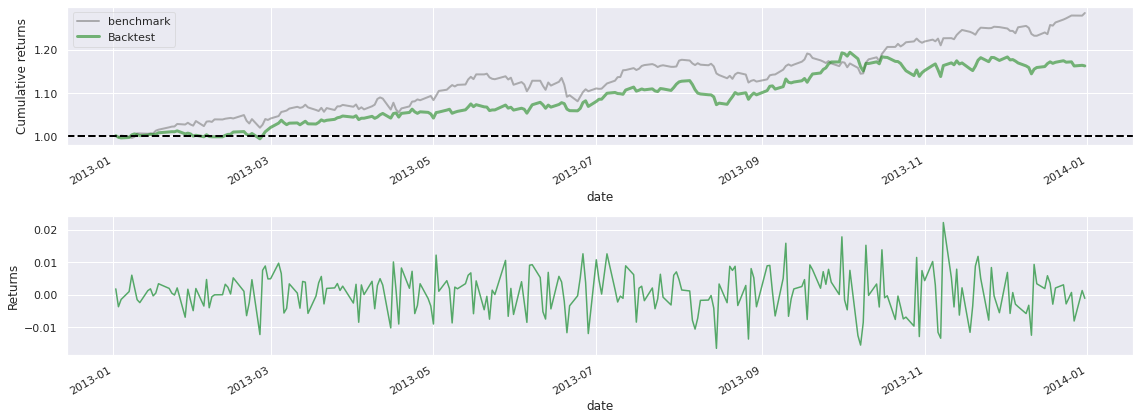

In [7]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

With the annual and monthly return plots, you can see which years and months the algorithm performed the best in. For instance, in the monthly heatmap plot, this algorithm performed the best in September 2013 (shaded in dark green). In a backtest with a longer period of time, these plots will reveal more information. Furthermore, the distribution of the monthly returns is also instructive in gauging how the algorithm performs in different periods throughout the year and if it is affected by seasonal patterns.

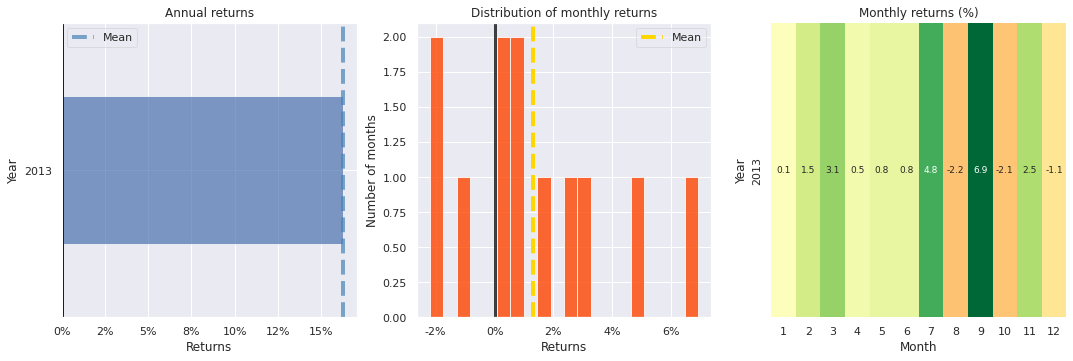

In [8]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

#### Return Quantiles

These box and whisker plots provide an overview of the return quantiles broken down by the return timeframe (daily / weekly / monthly) across the entire backtest time period.

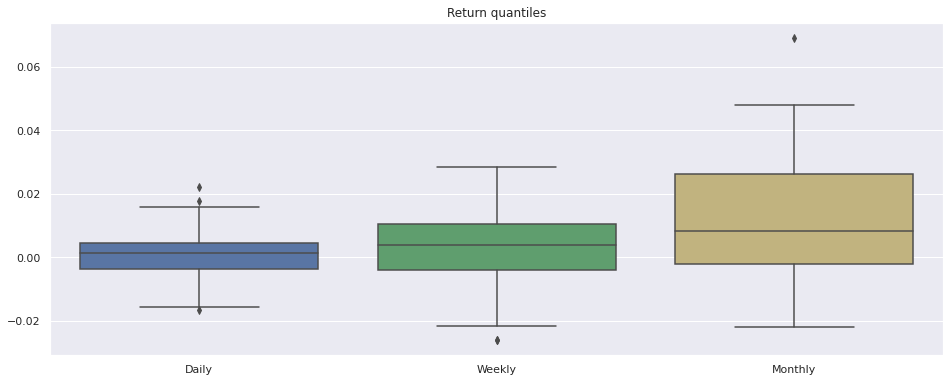

In [9]:
pf.plot_return_quantiles(bt_returns);

The center line in the middle of each box shows the median return, and the box shows the first quartile (25th percentile) as well as the 3rd quartile (75th percentile). While a high median return is always helpful, it is also important to understand the returns distribution. A tight box means that the bulk of the returns (25th - 75th percentile) fall within a tight bound - i.e. the returns are consistent and not volatile. A larger box means that the returns are more spread out. It is important, however, to take note of the scale to the left to put the quartiles in perspective. In addition, returns over longer periods of time will have a wider distribution as increasing the length of time increases the variability in returns. 

The 'whiskers' at the end indicate the returns which fall outside the 25th and 75th percentile. A tight box with long whiskers indicate that there may be outliers in the returns - which may not be ideal if the outliers are negative. This may indicate that your strategy may be susceptible to certain market conditions / time periods. 

### Rolling Plots

Below, we have several rolling plots which show how an estimate changes throughout backtest period. In the case of the rolling beta and the rolling Sharpe ratio, the rolling estimate gives us more information than single point estimate for the entire period. A rolling estimate allows the user to see if the risk-adjusted return of the algorithm (Sharpe ratio) is consistent over time or if it fluctuates significantly. A volatile Sharpe ratio may indicate that the strategy may be riskier at certain time points or that it does not perform as well at these time points. Likewise, a volatile rolling beta indicates that it is exposed to the market during certain time points - if the strategy is meant to be market neutral, this could be a red flag.

#### Rolling Beta Plot

The plot below shows the rolling beta of the strategy against benchmark returns over the entire period of the backtest. In this instance, the benchmark return of the SPY was used. Thus, the lower the rolling portfolio beta to the SPY, the more market neutral an algorithm is.

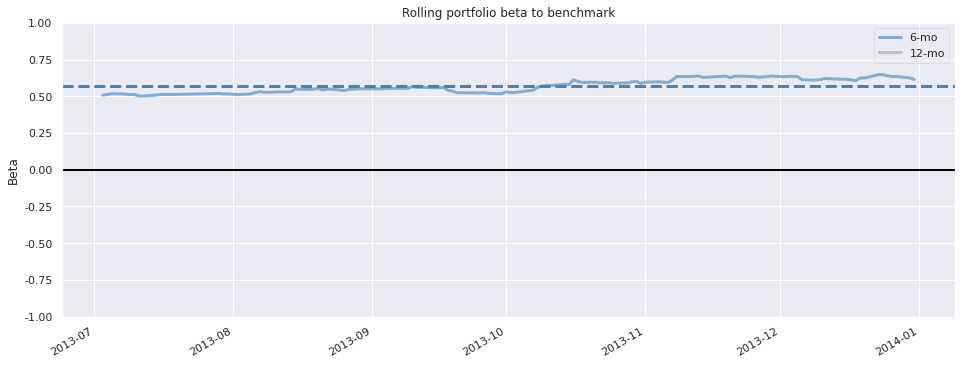

In [10]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);

#### Rolling Sharpe Ratio Plot

The plot below shows the rolling Sharpe ratio over the period of the backtest. This allows you to understand the performance of the algorithm at different time points.

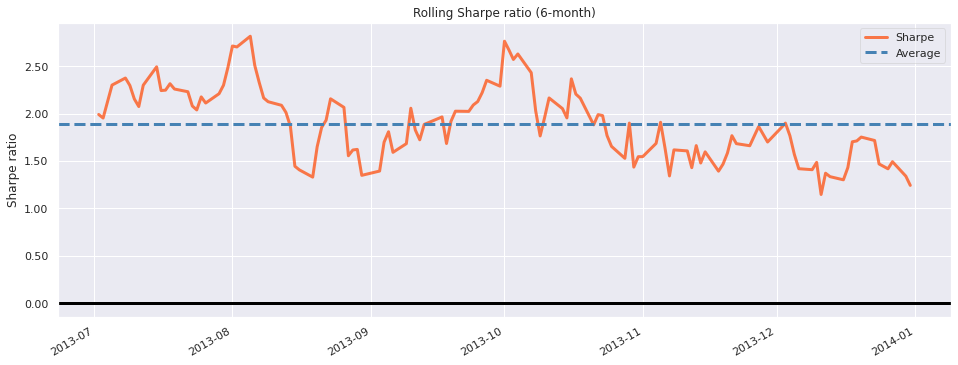

In [11]:
pf.plot_rolling_sharpe(bt_returns);

#### Drawdown Plots

In this plot, we visualize the drawdown chart described above. This chart provides an overview of the worst drawdown periods in the backtest. These periods show the time windows in the backtest in which the top 10 drawdowns occurred. 

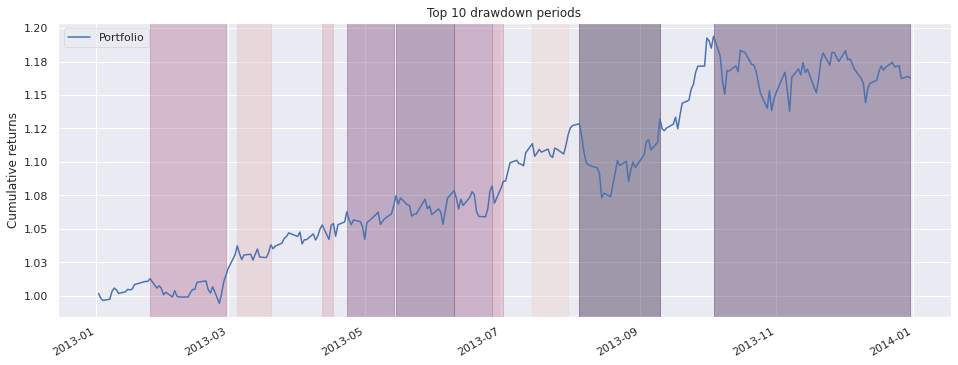

In [12]:
pf.plot_drawdown_periods(bt_returns);

This, coupled with the underwater plot, allows for a quick check into the time periods during which the algorithm struggles. Generally speaking, the less volatile an algorithm is, the more minimal the drawdowns.

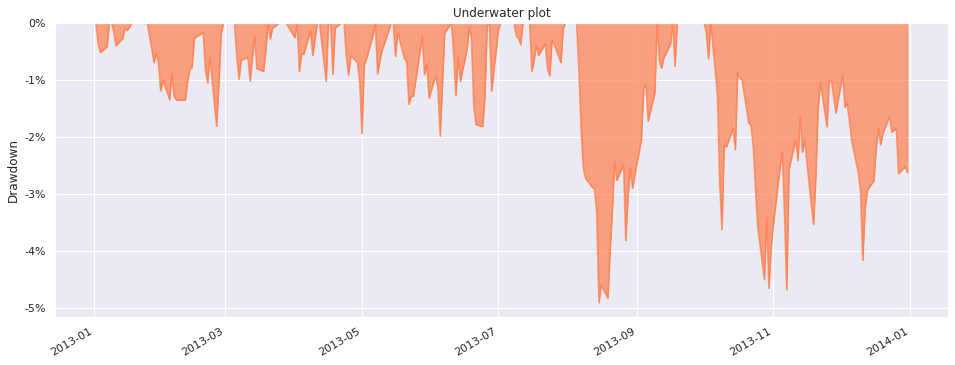

In [13]:
pf.plot_drawdown_underwater(bt_returns);

#### Gross Leverage

Gross leverage is the sum of long and short leverage exposure per share divided by net asset value. This plot allows you to see the amount of leverage being applied to the portfolio over the backtest period.

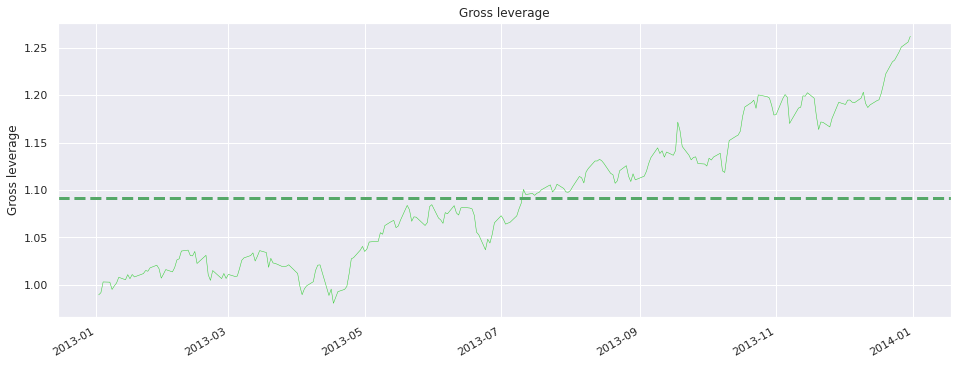

In [14]:
pf.plot_gross_leverage(bt_returns, bt_positions);

Monitoring the leverage of a strategy is important as it affects how you trade on margin. Unlike discretionary strategies where you could actively increase or decrease the leverage used in going long or short, algorithmic strategies automatically apply leverage during trading. Therefore, it is useful to monitor the gross leverage plot to ensure that the amount of leverage that your strategy uses is within the limits that you are comfortable with.

Good strategies generally start with an initial leverage of 1. Upon finding out the viability of the strategy by examining the Sharpe ratio and other metrics, leverage can be increased or decreased accordingly. A lower Sharpe ratio indicates that the strategy has a higher volatility per unit return, making it more risky to lever up. On the other hand, a higher Sharpe ratio indicates lower volatility per unit return, allowing you to increase the leverage and correspondingly, returns.

For more details, take a look at the lecture on Leverage.

### Positions Plots

#### Top Long and Short Positions

The tables below list the top 10 long and short positions of all time. The goal of each algorithm is to minimize the proportion of the portfolio invested in each security at any time point. This prevents the movement of any individual security from having a significant impact on the portfolio as a whole. The bigger the exposure a strategy has to any security, the greater the risk.

Generally, the biggest failure point for many strategies is high portfolio concentration in a few securities. While this may produce significant positive returns over a given time period, the converse can easily occur. Huge swings in a small number of equities would result in significant drawdowns. Good strategies tend to be those in which no security comprises more than 10% of the portfolio.

Top 10 long positions of all time,max
column,
Equity(FIBBG000K1J931 [CSIQ]),1.78%
Equity(FIBBG000FW8LZ9 [CLDX]),1.75%
Equity(FIBBG000BHG9K0 [ACAD]),1.62%
Equity(FIBBG000R01RJ8 [HIMX]),1.58%
Equity(FIBBG000FVQ185 [SPWR]),1.53%
Equity(FIBBG000PX4P81 [AEGR]),1.50%
Equity(FIBBG000DC3RT4 [SNTS]),1.21%
Equity(FIBBG0015QYC28 [SFUN]),1.16%
Equity(FIBBG000Q72QF9 [JKS]),1.13%


Top 10 short positions of all time,max
column,
Equity(FIBBG001BPFT54 [SCTY]),-1.66%
Equity(FIBBG002NLDLV8 [VIPS]),-1.47%
Equity(FIBBG003T67W19 [XONE]),-1.20%
Equity(FIBBG002CN8XN5 [GOGO]),-1.10%
Equity(FIBBG005915XN3 [VJET]),-0.97%
Equity(FIBBG001M8GFD0 [ONVO]),-0.93%
Equity(FIBBG003H0XV18 [YY]),-0.89%
Equity(FIBBG000PCNTM2 [STRZA]),-0.87%
Equity(FIBBG000NDV1D4 [TMUS]),-0.86%


Top 10 positions of all time,max
column,
Equity(FIBBG000K1J931 [CSIQ]),1.78%
Equity(FIBBG000FW8LZ9 [CLDX]),1.75%
Equity(FIBBG001BPFT54 [SCTY]),1.66%
Equity(FIBBG000BHG9K0 [ACAD]),1.62%
Equity(FIBBG000R01RJ8 [HIMX]),1.58%
Equity(FIBBG000FVQ185 [SPWR]),1.53%
Equity(FIBBG000PX4P81 [AEGR]),1.50%
Equity(FIBBG002NLDLV8 [VIPS]),1.47%
Equity(FIBBG000DC3RT4 [SNTS]),1.21%


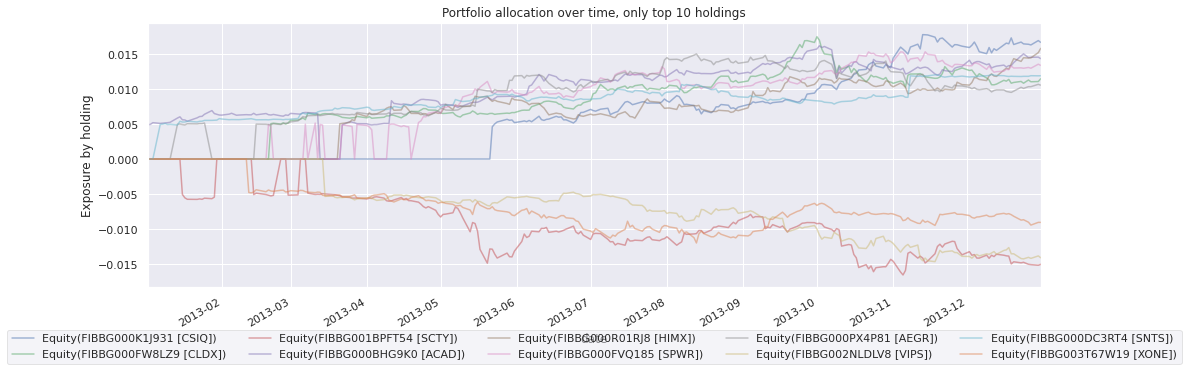

In [15]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

#### Holdings Per Day

The holdings per day allows us to gain an insight into whether the total portfolio holdings fluctuate from day to day. This plot provides a good sanity check as to whether the algorithm is performing as it should, or if there were any bugs which should be fixed. For instance, we can use to holdings plot to check if the trading behavior is expected, i.e. if there are extended periods in which the number of holdings is exceptionally low or if that the algorithm is not trading.

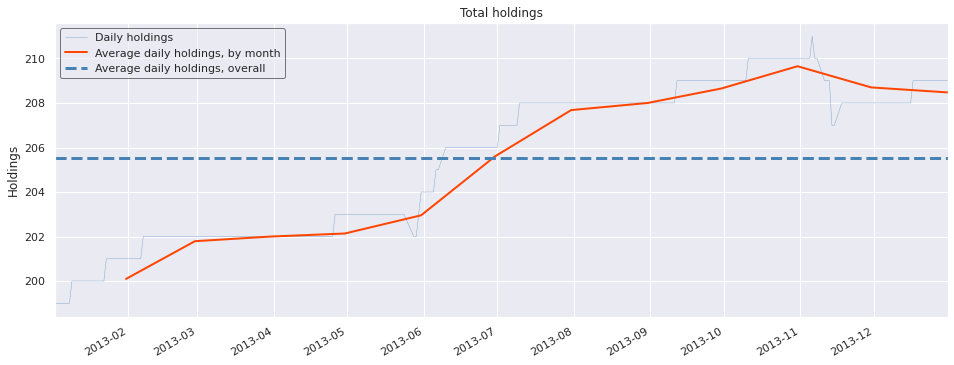

In [16]:
pf.plot_holdings(bt_returns, bt_positions);

### Transaction Plots

#### Daily Turnover

This plot reflects how many shares are traded as a fraction of total shares. The higher the daily turnover, the higher the transaction costs associated with the algorithm. However, this also means that the returns and risk metrics are better able to capture the underlying performance of the algorithm as the higher quantity of trades provides more samples (of returns, risk, etc.) to draw from. This would in turn give a better estimation on *Out of Sample* periods as well.

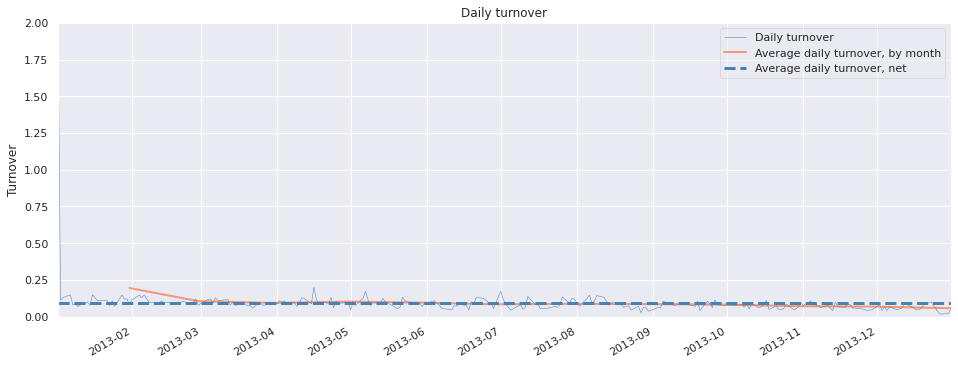

In [17]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);

Likewise, the Daily Turnover Histogram gives you an overview of the distribution of the turnover of your portfolio. This shows you both the average daily turnover of your portfolio and any outlier trading days.

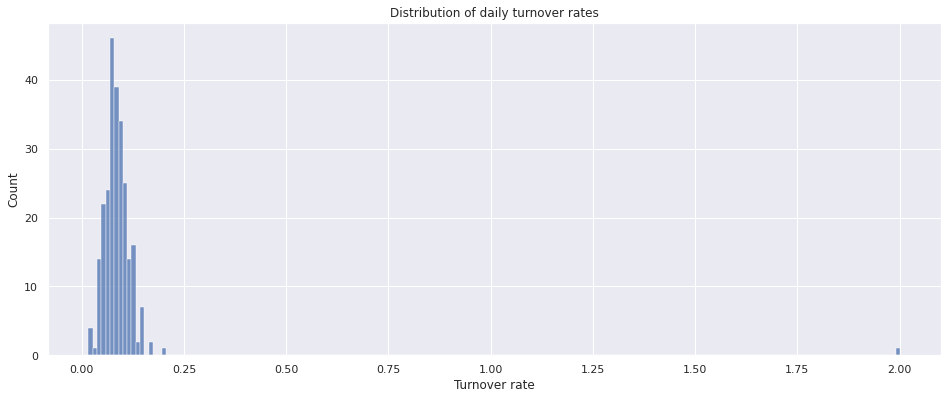

In [18]:
pf.plotting.plot_daily_turnover_hist(bt_transactions, bt_positions);

Similarly, another plot which allows you to gauge the number of transactions per day is the Daily Trading Volume plot. This shows the number of shares traded per day and displays the all-time daily trading average as well.

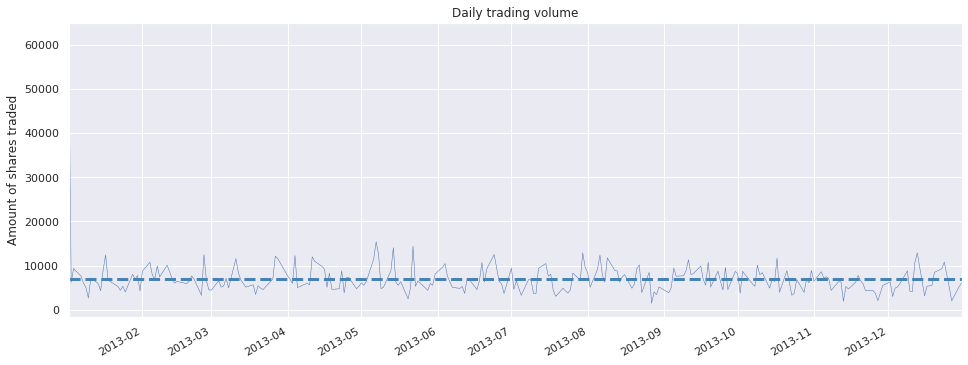

In [19]:
pf.plotting.plot_daily_volume(bt_returns, bt_transactions);

The transaction time histogram shows you **when** the algorithm makes its trades during each day. You can specify the size of the bin (each column's width) as well as the timezone in the function's parameters.

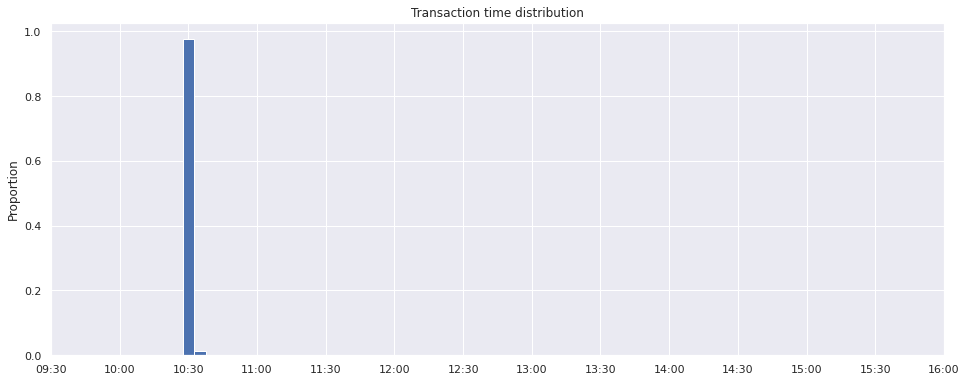

In [20]:
pf.plotting.plot_txn_time_hist(bt_transactions);

## Creating a Full Tear Sheet

To put these all together, we use a single function call to `pf.from_zipline_csv`.

In [ ]:
pf.from_zipline_csv("Lecture33-Backtest-Results.csv")

---

**Next Lecture:** [Factor Risk Exposure](Lecture34-Factor-Risk-Exposure.ipynb)

[Back to Introduction](Introduction.ipynb) 

---

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by QuantRocket LLC ("QuantRocket"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, the authors have not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information believed to be reliable at the time of publication. QuantRocket makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*